In [22]:
import pandas as pd 
import numpy as np
import locale

In [23]:
# Import in CSV files from resources 
global_space_launches_to_load = "resources\global_space_launches.csv"
important_missions_to_load = "resources\important_missions.csv"
cost_data_to_load = "resources\COST_DATA.csv"

global_space_launches= pd.read_csv(global_space_launches_to_load)
important_missions= pd.read_csv(important_missions_to_load)
cost_data = pd.read_csv(cost_data_to_load)


In [24]:
cost_data

,Vehicle,Operator,Year_of_First_Launch,Total_2017_Launches,Active_Launch_Sites,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Min_Mass_to_Sso_kg,Max_Mass_to_SSO_kg,Min_Mass_to_GTO_kg,Max_Mass_to_GTO_kg,Cost_Min,Cost_Max
0,Antares,Orbital ATK,2013.0,1.0,MARS,3500.0,7000.0,2100.0,"3,400",NaN,NaN,"$80,000,000.00","$85,000,000"
1,Atlas V,ULA and LMCLS,2002.0,6.0,CCAFS-VAFB,8123.0,18814.0,6424.0,"15,179","3,460","8,900","$110,000,000.00","$230,000,000"
2,Electron,Rocket Lab,2017.0,1.0,PSCA MAHIA . NZ,NaN,150.0,NaN,NaN,$4.9M,NaN,"$164,000,000.00","$400,000,000"
3,Falcon 9,SpaceX,2010.0,18.0,CCAFS-VAFB-KSC,NaN,13150.0,NaN,NaN,4850,"4,850","$61,200,000",NaN
4,Minotaur-C,Orbital ATK,2017.0,1.0,CCAFS-MARS-VAFB-WFF,1278.0,1458.0,912.0,"1,054",NaN,NaN,"$40,000,000.00","$50,000,000"
5,Pegasus XL,Orbital ATK,1994.0,0.0,CCAFS-KWAJALEIN-VAFB-WFF,NaN,450.0,NaN,325,NaN,NaN,"$40,000,000",NaN
6,Aplha,Firefly Aerospace,NaN,NaN,NaN,NaN,1000.0,NaN,650,NaN,NaN,"$10,000,000",NaN
7,Cab-3A,CubeCeb,2017.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,"$250,000",NaN
8,Falcon-Heavy,SpaceX,2017.0,NaN,KSC VAFB,NaN,63800.0,NaN,NaN,NaN,"26,700","$270,000,000",NaN
9,LauncherOne,Virgin Orbit,2017.0,NaN,Spaceport America,NaN,500.0,NaN,300,NaN,NaN,"$10,000,000",NaN


In [25]:
cost_data.dtypes

Vehicle                  object
Operator                 object
Year_of_First_Launch    float64
Total_2017_Launches     float64
Active_Launch_Sites      object
Min_Mass_to_LEO_KG      float64
Max_Mass_to_LEO_kg      float64
Min_Mass_to_Sso_kg      float64
Max_Mass_to_SSO_kg       object
Min_Mass_to_GTO_kg       object
Max_Mass_to_GTO_kg       object
Cost_Min                 object
Cost_Max                 object
dtype: object

In [26]:
cost_data['Cost_Min'] = cost_data['Cost_Min'].str.replace(',', '')
cost_data['Cost_Min'] = cost_data['Cost_Min'].str.replace('$', '')
cost_data['Cost_Min'] 

0      80000000.00
1     110000000.00
2     164000000.00
3         61200000
4      40000000.00
5         40000000
6         10000000
7           250000
8        270000000
9         10000000
10             NaN
11             NaN
12             NaN
13         3000000
14     85000000.00
Name: Cost_Min, dtype: object

In [27]:
cost_data = cost_data.dropna(subset=['Cost_Min'])
cost_data

,Vehicle,Operator,Year_of_First_Launch,Total_2017_Launches,Active_Launch_Sites,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Min_Mass_to_Sso_kg,Max_Mass_to_SSO_kg,Min_Mass_to_GTO_kg,Max_Mass_to_GTO_kg,Cost_Min,Cost_Max
0,Antares,Orbital ATK,2013.0,1.0,MARS,3500.0,7000.0,2100.0,"3,400",NaN,NaN,80000000.00,"$85,000,000"
1,Atlas V,ULA and LMCLS,2002.0,6.0,CCAFS-VAFB,8123.0,18814.0,6424.0,"15,179","3,460","8,900",110000000.00,"$230,000,000"
2,Electron,Rocket Lab,2017.0,1.0,PSCA MAHIA . NZ,NaN,150.0,NaN,NaN,$4.9M,NaN,164000000.00,"$400,000,000"
3,Falcon 9,SpaceX,2010.0,18.0,CCAFS-VAFB-KSC,NaN,13150.0,NaN,NaN,4850,"4,850",61200000,NaN
4,Minotaur-C,Orbital ATK,2017.0,1.0,CCAFS-MARS-VAFB-WFF,1278.0,1458.0,912.0,"1,054",NaN,NaN,40000000.00,"$50,000,000"
5,Pegasus XL,Orbital ATK,1994.0,0.0,CCAFS-KWAJALEIN-VAFB-WFF,NaN,450.0,NaN,325,NaN,NaN,40000000,NaN
6,Aplha,Firefly Aerospace,NaN,NaN,NaN,NaN,1000.0,NaN,650,NaN,NaN,10000000,NaN
7,Cab-3A,CubeCeb,2017.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,250000,NaN
8,Falcon-Heavy,SpaceX,2017.0,NaN,KSC VAFB,NaN,63800.0,NaN,NaN,NaN,"26,700",270000000,NaN
9,LauncherOne,Virgin Orbit,2017.0,NaN,Spaceport America,NaN,500.0,NaN,300,NaN,NaN,10000000,NaN


In [ ]:
cost_data['Cost_Min'] = cost_data['Cost_Min'].astype(float)

In [37]:
cost_data.dtypes

Vehicle                  object
Operator                 object
Year_of_First_Launch    float64
Total_2017_Launches     float64
Active_Launch_Sites      object
Min_Mass_to_LEO_KG      float64
Max_Mass_to_LEO_kg      float64
Min_Mass_to_Sso_kg      float64
Max_Mass_to_SSO_kg       object
Min_Mass_to_GTO_kg       object
Max_Mass_to_GTO_kg       object
Cost_Min                float64
Cost_Max                 object
dtype: object

In [38]:
clean_set_1 = cost_data.copy()
clean_set_1

,Vehicle,Operator,Year_of_First_Launch,Total_2017_Launches,Active_Launch_Sites,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Min_Mass_to_Sso_kg,Max_Mass_to_SSO_kg,Min_Mass_to_GTO_kg,Max_Mass_to_GTO_kg,Cost_Min,Cost_Max
0,Antares,Orbital ATK,2013.0,1.0,MARS,3500.0,7000.0,2100.0,"3,400",NaN,NaN,80000000.0,"$85,000,000"
1,Atlas V,ULA and LMCLS,2002.0,6.0,CCAFS-VAFB,8123.0,18814.0,6424.0,"15,179","3,460","8,900",110000000.0,"$230,000,000"
2,Electron,Rocket Lab,2017.0,1.0,PSCA MAHIA . NZ,NaN,150.0,NaN,NaN,$4.9M,NaN,164000000.0,"$400,000,000"
3,Falcon 9,SpaceX,2010.0,18.0,CCAFS-VAFB-KSC,NaN,13150.0,NaN,NaN,4850,"4,850",61200000.0,NaN
4,Minotaur-C,Orbital ATK,2017.0,1.0,CCAFS-MARS-VAFB-WFF,1278.0,1458.0,912.0,"1,054",NaN,NaN,40000000.0,"$50,000,000"
5,Pegasus XL,Orbital ATK,1994.0,0.0,CCAFS-KWAJALEIN-VAFB-WFF,NaN,450.0,NaN,325,NaN,NaN,40000000.0,NaN
6,Aplha,Firefly Aerospace,NaN,NaN,NaN,NaN,1000.0,NaN,650,NaN,NaN,10000000.0,NaN
7,Cab-3A,CubeCeb,2017.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,250000.0,NaN
8,Falcon-Heavy,SpaceX,2017.0,NaN,KSC VAFB,NaN,63800.0,NaN,NaN,NaN,"26,700",270000000.0,NaN
9,LauncherOne,Virgin Orbit,2017.0,NaN,Spaceport America,NaN,500.0,NaN,300,NaN,NaN,10000000.0,NaN


In [41]:
clean_set_2 = clean_set_1.reset_index()
clean_set_2

,index,Vehicle,Operator,Year_of_First_Launch,Total_2017_Launches,Active_Launch_Sites,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Min_Mass_to_Sso_kg,Max_Mass_to_SSO_kg,Min_Mass_to_GTO_kg,Max_Mass_to_GTO_kg,Cost_Min,Cost_Max
0,0,Antares,Orbital ATK,2013.0,1.0,MARS,3500.0,7000.0,2100.0,"3,400",NaN,NaN,80000000.0,"$85,000,000"
1,1,Atlas V,ULA and LMCLS,2002.0,6.0,CCAFS-VAFB,8123.0,18814.0,6424.0,"15,179","3,460","8,900",110000000.0,"$230,000,000"
2,2,Electron,Rocket Lab,2017.0,1.0,PSCA MAHIA . NZ,NaN,150.0,NaN,NaN,$4.9M,NaN,164000000.0,"$400,000,000"
3,3,Falcon 9,SpaceX,2010.0,18.0,CCAFS-VAFB-KSC,NaN,13150.0,NaN,NaN,4850,"4,850",61200000.0,NaN
4,4,Minotaur-C,Orbital ATK,2017.0,1.0,CCAFS-MARS-VAFB-WFF,1278.0,1458.0,912.0,"1,054",NaN,NaN,40000000.0,"$50,000,000"
5,5,Pegasus XL,Orbital ATK,1994.0,0.0,CCAFS-KWAJALEIN-VAFB-WFF,NaN,450.0,NaN,325,NaN,NaN,40000000.0,NaN
6,6,Aplha,Firefly Aerospace,NaN,NaN,NaN,NaN,1000.0,NaN,650,NaN,NaN,10000000.0,NaN
7,7,Cab-3A,CubeCeb,2017.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,250000.0,NaN
8,8,Falcon-Heavy,SpaceX,2017.0,NaN,KSC VAFB,NaN,63800.0,NaN,NaN,NaN,"26,700",270000000.0,NaN
9,9,LauncherOne,Virgin Orbit,2017.0,NaN,Spaceport America,NaN,500.0,NaN,300,NaN,NaN,10000000.0,NaN


<AxesSubplot:xlabel='Max_Mass_to_LEO_kg', ylabel='Cost_Min'>

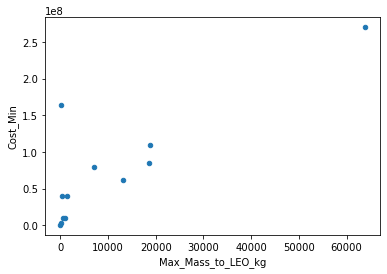

In [49]:
clean_set_2.plot.scatter(x='Max_Mass_to_LEO_kg', y='Cost_Min')